# Canadian Housing Data
In this activity you will create a report to plot the median home prices and units available for Canadian provinces. You will use your findings to recommend a province that you think has the best investment potential in Canada.

## 1. Import Modules

In [1]:
# Import Modules
import pandas as pd
import os
import json
import requests
from dotenv import load_dotenv
import matplotlib.pyplot as plt


## 2. Load Environment Variables
  - Store your Quandl api key in a variable named `QUANDL_API_KEY` in a `.env` file.

In [2]:
# Load .env enviroment variables into the notebook
load_dotenv()

True

In [3]:
# Get the API key from the environment variable and store as Python variable
quandl_api_key = os.getenv("QUANDL_API_KEY")


## 3. Set Start and End Dates
  - Look at housing data between November 2009 to November 2020.

In [4]:
# Start and End dates
start_date = "2009-11-01"
end_date = "2020-11-01"

## 4. Loop Over the Provinces
  - Using the provided province list loop over each province using the following url builder:
    ``` text
    https://www.quandl.com/api/v3/datasets/CMHC/HPPU50_{province}?start_date={start_date}&end_date={end_date}&api_key={quandl_api_key}
    ```
  - Create a scatter plot for each province using the `Date` and `Median` values for `x` and `y`. Use the `c` option in [`scatter`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) to shade each point according to the number of `Units`. Use `inferno` for the `cmap` parameter.

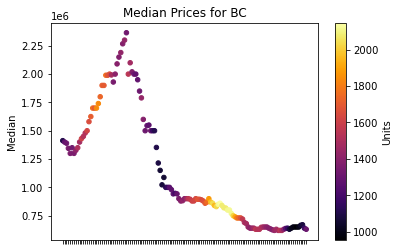

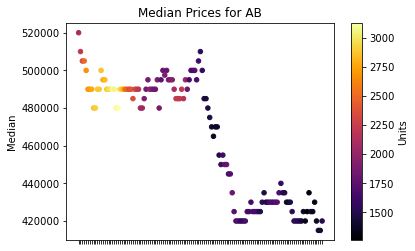

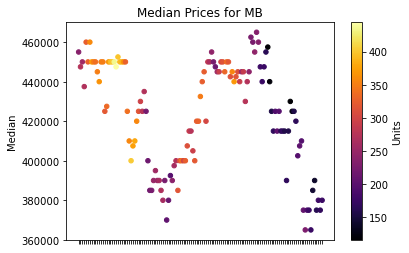

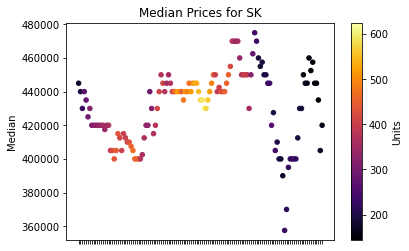

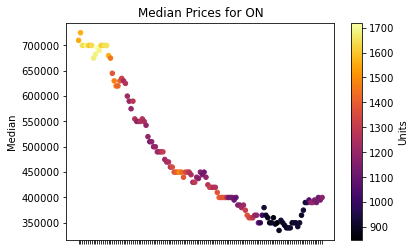

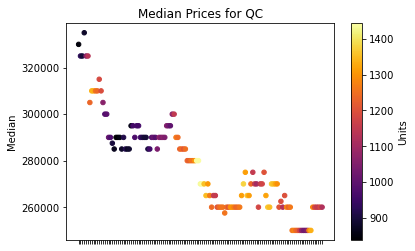

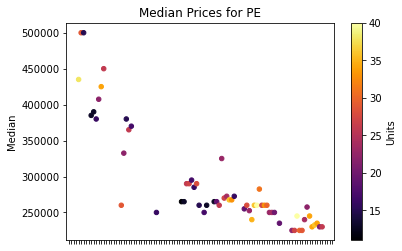

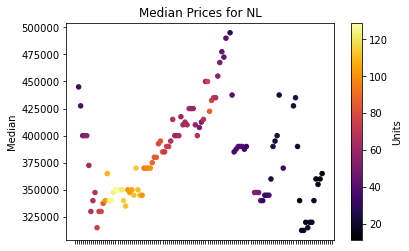

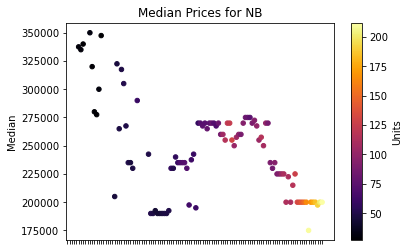

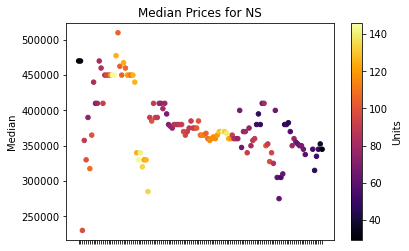

In [5]:
# List of provinces
province_list = ["BC", "AB", "MB", "SK", "ON", "QC", "PE", "NL", "NB", "NS"]

# Loop through the provinces and get data for each one.

for province in province_list:
    url = f"https://www.quandl.com/api/v3/datasets/CMHC/HPPU50_{province}?start_date={start_date}&end_date={end_date}&api_key={quandl_api_key}"
    response = requests.get(url).json()

    #Populate a list of series
    list_series = []
    for row in response["dataset"]["data"]:
        list_series.append(pd.Series(row))
    column_names = response["dataset"]["column_names"]

    # Create a dataframe from the list of series
    province_df = pd.DataFrame(data=list_series)
    province_df.columns = column_names

    # Scatter Plot for province
    province_df.plot.scatter(
        x="Date",
        y="Median",
        c="Units",
        title=f"Median Prices for {province}",
        cmap="inferno",
    )
